<a href="https://colab.research.google.com/github/joaopauloev/Data-Science/blob/master/PROJETO_Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---
# Analisando a Violência no Rio de Janeiro

<center><img alt="Rio de Janeiro" width="40%" src="https://i.imgur.com/HmLfoXV.png"></center>

O pior resultado da década em relação a violência no Brasil, segundo ranking formulado pelo Instituto de Pesquisas Econômicas Aplicadas [(Ipea)](https://www.ipea.gov.br/portal/). 

Estado do Rio de Janeiro é famoso por ser um dos melhores pontos turísticos do mundo, belas praias, a maravilha do Cristo Redentor, o lindo Pão de Açúcar e seu empolgante carnaval, porém, a criminalidade e sua violência são destaques na mídia diariamente.

Nossa tecnologia atualmente tem contribuído drásticamente com informações e várias fontes de dados para diminuir os casos. 

Como exemplo, o governo do Rio de Janeiro traz a iniciativa do portal [ISPDados](http://www.ispdados.rj.gov.br/) nele é encontrado Dados Abertos do Instituto de Segurança Pública. Neste projeto, farei uma análise em cima dos indicadores estatísticos da violência no Rio, explorando algumas das variáveis fornecidas.

## Obtenção dos Dados

Os dados foram obtidos através do portal [ISPDados](http://www.ispdados.rj.gov.br/), é uma página de Dados Abertos do Instituto de Segurança Pública do Governo do Estado do Rio de Janeiro.

Nele você encontra todas as estatísticas divulgadas a partir dos Registros de Ocorrência(RO).

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

### Importando os dados

In [32]:
# importa os pacotes necessários
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

# visualizar as 8 primeiras entradas no dataset
df.head(8)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3
5,1991,6,647,NaN,14,NaN,201,2977,NaN,NaN,NaN,518,178,1354,82,831,342,37,NaN,NaN,NaN,NaN,NaN,81,3423,1992,673,NaN,NaN,NaN,3519,6184,NaN,NaN,NaN,NaN,157,NaN,NaN,NaN,802,NaN,NaN,NaN,NaN,NaN,NaN,111,NaN,NaN,NaN,661,1173,1354,NaN,3
6,1991,7,558,NaN,14,NaN,201,2784,NaN,NaN,NaN,496,186,1365,82,797,308,25,NaN,NaN,NaN,NaN,NaN,94,3353,1978,700,NaN,NaN,NaN,3604,6282,NaN,NaN,NaN,NaN,203,NaN,NaN,NaN,870,NaN,NaN,NaN,NaN,NaN,NaN,126,NaN,NaN,NaN,572,1105,1365,NaN,3
7,1991,8,557,NaN,11,NaN,209,3134,NaN,NaN,NaN,498,189,1347,71,813,299,29,NaN,NaN,NaN,NaN,NaN,88,3334,1835,794,NaN,NaN,NaN,3641,6270,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,809,NaN,NaN,NaN,NaN,NaN,NaN,79,NaN,NaN,NaN,568,1112,1347,NaN,3


## Análise Inicial dos Dados

Essa fase visualiza a entrada do nosso *dataset* e demostra como estão estruturadas as informações.

Depois de todos esses detalhes em mente, agora vou visualizar esse dataset como está organizado, os dados como são apresentados e ter uma ideia do que posso fazer com eles.

# **Dicionário das variáveis**

* **vano** - ano da ocorrência do ato de violência
* **mes** - mês da ocorrência do ato de violência
* **hom_doloso** - quantidade de homícidios dolosos
* **lesao_corp_morte** - quantidade de lesões corporais seguidas de morte
* **latrocinio** - quantidade de latrocínios
* **hom_por_interv_policial** - quantidade de homícidios por intervenção policial
* **tentat_hom** - quantidade de tentativas de homicídios
* **lesao_corp_dolosa** - quantidade de lesões corporais dolosas
* **estupro** - quantidade de estupros
* **hom_culposo** - quantidade de homicídios culposos
* **lesao_corp_culposa** - quantidade de lesões corporais culposas
* **roubo_comercio** - quantidade de roubos em comércios
* **roubo_residencia** - quantidade de roubos em residências
* **roubo_veiculo** - quantidade de roubos de veículos
* **roubo_carga** - quantidade de roubos de carga
* **roubo_transeunte** - quantidade de roubos a pedestre
* **roubo_em_coletivo** - quantidade de roubos em coletivos
* **roubo_banco** - quantidade de roubos a bancos
* **roubo_cx_eletronico** - quantidade de roubos a caixas eletrônicos
* **roubo_celular** - quantidade de roubos de aparelhos celulares
* **roubo_conducao_saque** - quantidade de roubos em condução para saque de dinheiro em espécie
* **roubo_apos_saque** - quantidade de roubos após o saque de dinheiro em espécie
* **roubo_bicicleta** - quantidade de roubos de bicicletas
* **outros_roubos** - quantidade de outros tipos de roubos
* **total_roubos** - quantidade de total de roubos
* **furto_veiculos** - quantidade de furtos de veículos
* **furto_transeunte** - quantidade de furtos a pedestre
* **furto_coletivo** - quantidade de furtos de coletivos
* **furto_celular** - quantidade de furtos de aparelhos celulares
* **furto_bicicleta** - quantidade de furtos de bicicletas
* **outros_furtos** - quantidade de outro tipos de furtos
* **total_furtos** - quantidade total de furtos
* **sequestro** - quantidade de sequestros
* **extorsao** - quantidade de extorsões
* **sequestro_relampago** - quantidade de sequestros relâmpago
* **estelionato** - quantidade de estelionatos
* **apreensao_drogas** - quantidade de apreensão de drogas
* **posse_drogas** - quantidade de posse de drogas
* **trafico_drogas** - quantidade de tráfico de drogas
* **apreensao_drogas_sem_autor** - quantidade de apreensões de drogas sem autor
* **recuperacao_veiculos** - quantidade de recuperação de veículos
* **apf** - quantidade de prisão em flagrante
* **aaapai** - quantidade de apreensão de adolescente por ato infracional
* **cmp** - quantidade de mandado de prisão
* **cmba** - quantidade de mandado de busca e apreensão
* **ameaca** - quantidade de ameaças
* **pessoas_desaparecidas** - quantidade de pessoas desaparecidas
* **encontro_cadaver** - quantidade de encontro de cadáveres
* **encontro_ossada** - quantidade de encontro de ossadas
* **pol_militares_mortos_serv** - quantidade de policiais militares mortos em serviço
* **pol_civis_mortos_serv** - quantidade de policiais civis mortos em serviço
* **indicador_letalidade** - indicador de letalidade
* **indicador_roubo_rua** - indicador de roubos de rua
* **indicador_roubo_veic** - indicador de roubos de veículos
* **registro_ocorrencias** - registros de ocorrências
* **fase** - variável desconhecida



Antes de explorar nosso *dataset*, é preciso entender o que encontra-se dentro do arquivo. Vamos descobrir as suas dimensões, quantas colunas(Variáveis) e linhas(Entradas) têm no dataframe.

In [21]:
# verificar o tamanho do DataFrame
print("Variáveis:\t {}\n".format(df.shape[1]))
print("Entradas:\t {}".format(df.shape[0]))

Variáveis:	 56

Entradas:	 344


Agora que já sabemos a dimensão dos dados que estamos lidando, vamos verificar quais variáveis nós temos, visualizando suas colunas existentes.

In [34]:
# vizualisar os nomes das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Depois de encontrarmos as variáveis e colunas que temos, com essa informação é importante analisar o tipo de cada variável é bastante útil, pode-se ter um norte na fase de outliers(valores ausentes que foge da normalidade). 

Esse tipo de informação ajudará a direcionar nosso trabalho na fase de limpeza dos dados.

In [10]:
# descobrir os tipos das variáveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Notei que todas as variáveis presentes no dataset são do tipo numérico, sejam elas `int`ou `float`. 

PS: *Quem tiver curiosidade ou interesse sobre os tipos de variáveis neste [artigo](https://pt.wikibooks.org/wiki/Python/Conceitos_b%C3%A1sicos/Tipos_e_operadores) explica os conceitos básicos.*

É interessante reparar que algumas variáveis apresentam muitos dados ausentes, como ***lesao_corp_morte, estupro, hom_culposo, roubo_celular e trafico_drogas***. Dado o grande intervalo de tempo apresentado no *dataset*, podemos sugerir algumas hipóteses do que poderia explicar essa ausência, e como podemos contorná-la para continuar explorando o conjunto de dados.

* Como temos dados registrados desde o ano de 1991, alguns desses crimes poderiam não estar sendo contabilizados pelo órgão que coletou esses dados e gerou esse dataset. Estarem ausentes não significa que não existiram, e vamos pensar em formas de lidar com essa ausência logo mais.

* Infelizmente, se tratando de Brasil, se hoje temos uma cultura de dados que ainda deixa a desejar, o que dizer da mesma no período em tela? Devemos levar em consideração também o formato em que esses dados eram registrados à época. Será que foram registrados corretamente e perdidos em períodos de digitalização? Ou será que o gerenciamento dessas informações sempre foi falho?

Antes de decidirmos o que fazer em relação aos dados ausentes, vamos verificar a proporção deles em relação à totalidade do dataset.

In [12]:
# visualizar os dados inexistentes das colunas
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Acima, podemos ver que algumas das variáveis tem valores faltantes em proporções consideráveis como é o exemplo de crimes relacionados **a bicicletas** e **apreensão de drogas**.

Como os dados estão estruturados ao longo do tempo, uma forma de realizar uma análise que condiz a melhor com a realidade, podemos analisá-los a partir da data em que começaram a ser registrados.

Além disso, existem outras formas de encararmos e explorarmos os dados, como por exemplo:

* Números anuais por crime.
* Números mensais por crime.
* Categorias de crimes (Contra a vida, Contra o patrimônio, etc.)

## Informações Estatísticas da Violência no Rio de Janeiro

Usando o método `describe` podemos visualizar a distribuição estatística do dataframe.

Utilizando esse método, temos informações que podem nos ajudar a:

* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.

In [13]:
# visualizar o resultado estatístico do DataFrame
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

Nota-se que os crimes de *estupro* tem em média **369** e no mínimo **188** casos por mês e os *homicídios dolosos* chegam a ter **500 à 577** casos mensais.

### Crimes Contra o Patrimônio - Veículos

Vou dedicar essa fase do projeto para analisar dados em relação aos crimes de roubo e furto de veículos.

Problema muito comum nas grandes metrópoles brasileiras, esse tipo de crime merece destaque. Temos dados sobre roubo, furto e recuperação de veículos, conseguimos utilizar essas informações para encontrar resultados pertinentes em relação à situação e ao combate a esse tipo de crime.

In [14]:
# visualizar a média da variável roubo_veiculo
mean_roubo_veiculo = df.roubo_veiculo.mean()
print(round(mean_roubo_veiculo,2))

2448.7


Acima, podemos analisar que a média da variável roubo de veículos é de 2448.7 por mês.

In [15]:
# visualizar a média da variável furto_veiculos
mean_furto_veiculos = df.furto_veiculos.mean()
print(round(mean_furto_veiculos,2))

1674.67


Em relação aos furtos, os números são um pouco menores, mas ainda altos. Foram registrados, em média, 1674.67 furtos de veículos por mês.

In [17]:
# visualizar a média da variável recuperacao_veiculos
mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()

# total de veículos perdidos
total = mean_roubo_veiculo + mean_furto_veiculos
print('Média de Veículos Perdidos por Mês: {:.2f} '.format(total))
print('Veículos Recuperados por Mês: {:.2f}'.format(mean_recuperacao_veiculos))

# porcentagem de veículos recuperados
pct = mean_recuperacao_veiculos/total*100

print('{:.2f}% dos veículos roubados ou furtados são recuperados.'.format(pct))

Média de Veículos Perdidos por Mês: 4123.37 
Veículos Recuperados por Mês: 1772.24
42.98% dos veículos roubados ou furtados são recuperados.


### Crimes Contra a Vida

Abaixo, vamos identificar qual foi o máximo e mínimo registrado para a variável `hom_doloso` ao longo do período observado no *dataset*.

In [18]:
# valores max e min de hom_doloso
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

# visualizar os valores máximos e mínimos
print("Min:\t{}".format(min_hom_doloso))
print("Max:\t{}".format(max_hom_doloso))

Min:	272
Max:	831


Acima podemos ver que no mês com menor número de casos foram registrados 272 homicídios dolosos. 

Em relação ao mês com números mais elevado, houveram 831 homicídios dolosos.

Vamos analisar um pouco mais a fundo esses dados.

In [19]:
# visualizando o mês com menor número de homicídios dolosos
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [20]:
# visualizando o mês com maior número de homicídios dolosos
df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


Acima, notei que em Janeiro de 1995 foi o mês com mais casos de homicídios dolosos registrados no nosso *dataset*, enquanto em Junho de 2015 teve o menor número de casos.

Isto compreende um bom sinal, indicando que, talvez, o crime venha diminuindo.  Apenas uma análise mais aprofundada possa falar.

## Visualização de Dados

Irei realizar uma análise com histograma em relação à variável **hom_doloso**, em determinada coluna do nosso *dataset*, onde posso isolar a variável escolhida para entender melhor sua distribuição dos valores. Posso com essa ferramenta criar uma observação e melhor entendimento visual. 


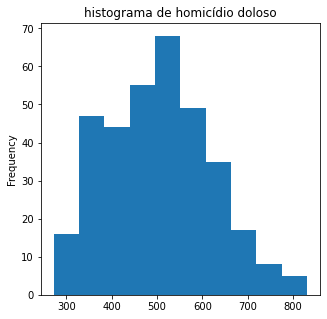

In [24]:
# plotar um histograma dos homicídios dolosos
df.hom_doloso.plot(kind="hist",figsize=(5,5), title="histograma de homicídio doloso");

Posso afirmar, no gráfico acima, existem de **500 a 550** casos de homicídios dolosos registrados no *dataset* no período de **70** meses.

Foram registrados **800** homicídios dolosos em menos de **10** meses.

Vou analisar a variável `roubo_em_coletivo` utilizando um gráfico de linha.

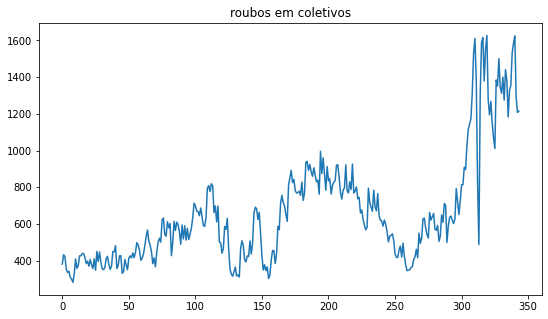

In [29]:
# plotar um gráfico de linhas dos roubos em coletivos
df.roubo_em_coletivo.plot(title="roubos em coletivos",figsize=(9,5));

O gráfico acima, demonstrou que nos últimos meses teve um aumento significativo de roubos em coletivos no estado do Rio de Janeiro.

## Conclusão

Em virtude dos insights mencionados, posso verificar nessa análise alguns dados interessantes:

* Em vista a crimes relacionados **a bicicletas** e **apreensão de drogas** são os maiores consequentemente **80%** e **52%** de valores ausentes por falta de informações.
* Dado o exposto de ter em média **369** casos de estupros por mês.
* Pela observação dos aspectos analisados **42.98%** dos veículos roubados são recuperados.
* Levando-se em consideração aos homicídios dolosos existem mais de **500** casos registrados em um período **70** meses.
* A partir de 2017 teve um aumento considerável de roubos em coletivos no Rio de Janeiro. Talvez, o período pós-olímpico seja uma das razões. 

Aprendi uma lição, que existe a necessidade de observar a cada detalhe do seu *dataset* quando está lidando com dados reais, principalmente quando você extraí de sites e portais com dados abertos. A segurança pública tem que urgentemente planejar soluções devido a tendência do seus dados de criminalidade só aumentarem com os anos.

Obrigado pela leitura e me acompanhe no [LinkedIn](https://bit.ly/2VBPzGK) e [github](https://github.com/joaopauloev) para outros artigos e análises. Abraço!